In [1]:
library(rethinking)

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.16.2, packaged: 2017-07-03 09:24:58 UTC, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: parallel
rethinking (Version 1.70)


In [2]:
data(foxes)

In [3]:
Fx <- foxes

In [4]:
summary(foxes$area)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.090   2.590   3.130   3.169   3.772   5.070 

In [5]:
#(1) 
area.Model <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b*area ,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,       
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$weight) , sigma=sd(Fx$weight) , b=0 ) )

area.seq<-seq(from=1,to=5,by=.5)

#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu <- link( area.Model , data=data.frame(area=area.seq) )
#Draw Prediction Simulations from psterior. There's variance/uncertainty in prediction/outcome.
sim.weight <- sim( area.Model , data=data.frame(area=area.seq),   n=1e4  ) 

[ 1000 / 1000 ]
[ 10000 / 10000 ]


In [33]:
HPDI(samples = sim.weight, prob = c(.5, .89, .97))
HPDI(samples = Fx$weight,prob = c(.5, .89, .97) )

|0.97    |0.89     |0.5     0.5|    0.89|    0.97| 
2.174856 2.881766 4.008467 3.961476 2.843020 2.237763

|0.97 |0.89  |0.5  0.5| 0.89| 0.97| 
 1.92  2.78  3.25  4.84  6.31  6.86

In [8]:
mean(Fx$weight)
mean(sim.weight)

[1] 4.529655

[1] 4.528819

In [9]:
area.Model


Maximum a posteriori (MAP) model fit

Formula:
weight ~ dnorm(mu, sigma)
mu <- a + b * area
a ~ dnorm(4, 100)
b ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
         a      sigma          b 
4.45094203 1.17868348 0.02483738 

Log-likelihood: -183.67 

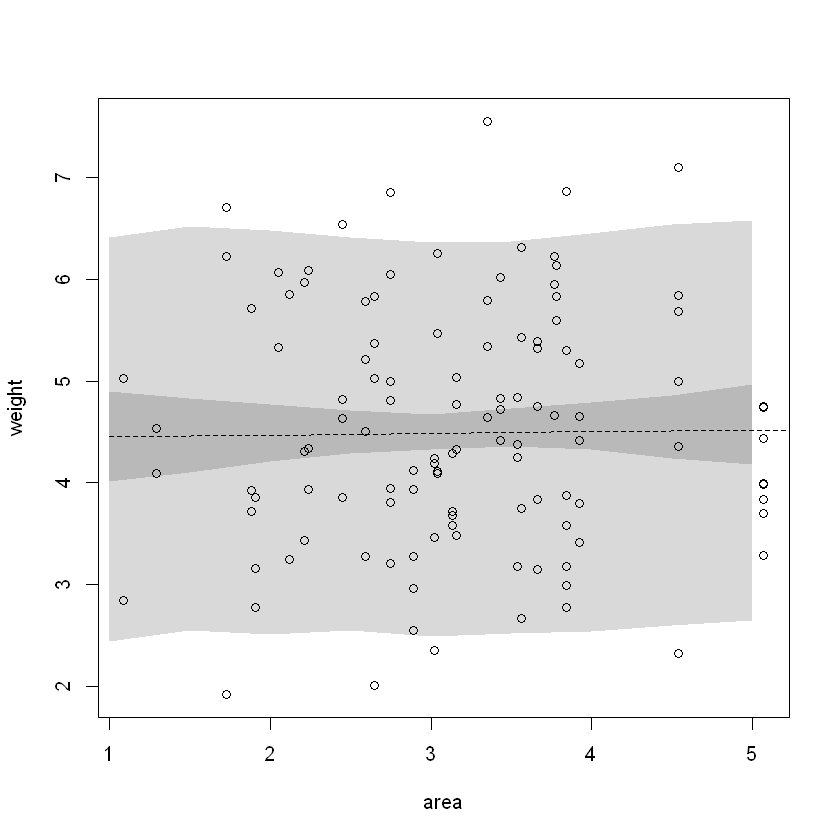

In [10]:
plot(weight~area, Fx)
lines(apply( mu , 2 , mean ), lty=2)
shade(apply( sim.weight , 2 , HPDI, prob = 0.9 ),area.seq)
shade(apply( mu , 2 , HPDI, prob = 0.9 ),area.seq)

In [27]:
#(2) 
groupsize.Model <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b*groupsize ,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,       
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$weight) , sigma=sd(Fx$weight) , b=0 ) )

size.seq<-seq(from=2,to=8,by=.5)

#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu1 <- link( groupsize.Model , data=data.frame(groupsize=size.seq) )
#Draw Prediction Simulations from psterior. There's variance/uncertainty in prediction/outcome.
sim.weight1 <- sim( groupsize.Model , data=data.frame(groupsize=size.seq),   n=1e4  ) 

[ 1000 / 1000 ]
[ 10000 / 10000 ]


In [34]:
HPDI(samples = sim.weight1, prob = c(.5, .89, .97))
HPDI(samples = Fx$weight,prob = c(.5, .89, .97) )

|0.97    |0.89     |0.5     0.5|    0.89|    0.97| 
2.236889 3.048024 4.061838 3.932819 2.898577 2.263940

|0.97 |0.89  |0.5  0.5| 0.89| 0.97| 
 1.92  2.78  3.25  4.84  6.31  6.86

In [35]:
mean(Fx$weight)
mean(sim.weight1)

[1] 4.529655

[1] 4.453673

In [36]:
groupsize.Model


Maximum a posteriori (MAP) model fit

Formula:
weight ~ dnorm(mu, sigma)
mu <- a + b * groupsize
a ~ dnorm(4, 100)
b ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
         a      sigma          b 
 5.0679376  1.1635300 -0.1238907 

Log-likelihood: -182.17 

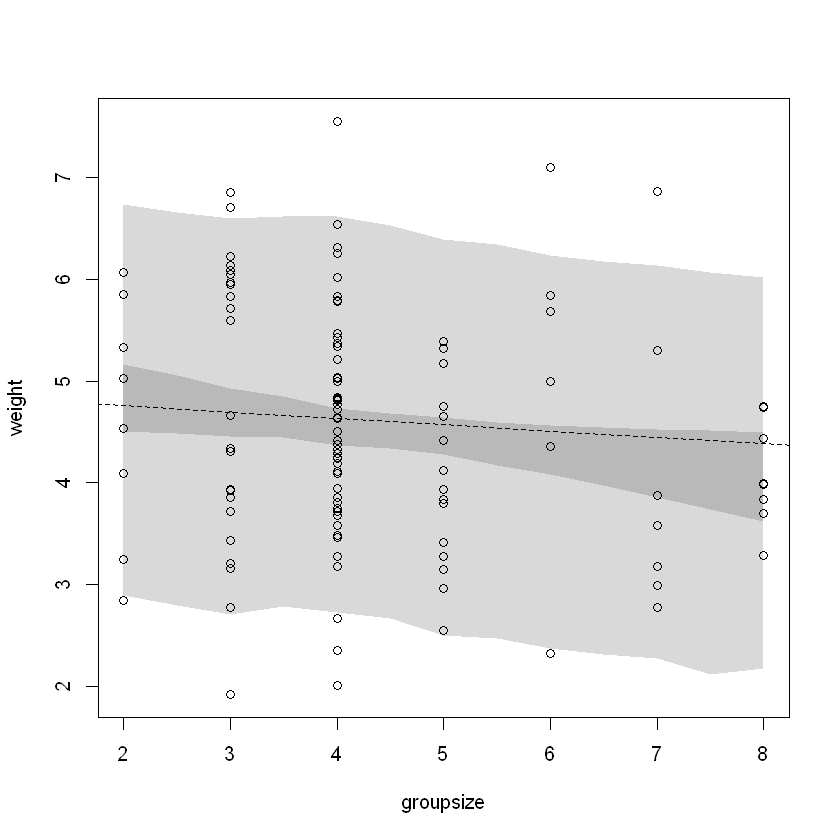

In [39]:
plot(weight~groupsize, Fx)
lines(apply( mu1 , 2 , mean ), lty=2)
#lines(apply( sim.weight1 , 2 , mean ))
shade(apply( sim.weight1 , 2 , HPDI, prob = 0.9 ),size.seq)
shade(apply( mu1 , 2 , HPDI, prob = 0.9 ),size.seq)

In [43]:
#(1) 
Multi.Model <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b*area +b1*groupsize,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) , 
        b1 ~ dnorm( 0 , 10 ) , 
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$weight) , sigma=sd(Fx$weight) , b=0 ,b1=0) )

size.seq<-seq(from=2,to=8, length.out=1e3)
area.seq<-seq(from=1,to=5, length.out=1e3)

#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu1 <- link( Multi.Model , data=data.frame(groupsize=size.seq,area=area.seq) )
#Draw Prediction Simulations from psterior. There's variance/uncertainty in prediction/outcome.
sim.weight1 <- sim( Multi.Model , data=data.frame(groupsize=size.seq, area=area.seq),   n=1e4  ) 

[ 1000 / 1000 ]
[ 10000 / 10000 ]


In [44]:
Multi.Model


Maximum a posteriori (MAP) model fit

Formula:
weight ~ dnorm(mu, sigma)
mu <- a + b * area + b1 * groupsize
a ~ dnorm(4, 100)
b ~ dnorm(0, 10)
b1 ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
         a      sigma          b         b1 
 4.4504217  1.1184517  0.6178220 -0.4324061 

Log-likelihood: -177.58 

In [ ]:
plot(weight~groupsize, Fx)
lines(apply( mu1 , 2 , mean ), lty=2)
#lines(apply( sim.weight1 , 2 , mean ))
shade(apply( sim.weight1 , 2 , HPDI, prob = 0.9 ),size.seq)
shade(apply( mu1 , 2 , HPDI, prob = 0.9 ),size.seq)